<a href="https://colab.research.google.com/github/nsprabha/neurological_disorder/blob/main/hybridqnncnnfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/final_dataset/mri_dataset_balanced.zip"
extract_path = "/content/mri_dataset_balanced"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [ ]:
import os

balanced_dataset_path = "/content/mri_dataset_balanced/content/mri_dataset_balanced"


class_counts = {}
for class_name in sorted(os.listdir(balanced_dataset_path)):
    class_dir = os.path.join(balanced_dataset_path, class_name)
    if os.path.isdir(class_dir):
        num_images = len([img for img in os.listdir(class_dir) if img.endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name] = num_images


print("\n Balanced Dataset Summary \n")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

total_images = sum(class_counts.values())
print(f"\n Total Images in Balanced Dataset: {total_images}")



 Balanced Dataset Summary 

Brain Atrophy: 1000 images
Left Retro-orbital Haemangioma: 1000 images
Stroke (Haemorrhage): 865 images
glioma: 1385 images
healthy: 1506 images
meningioma: 1398 images
pituitary: 1433 images

 Total Images in Balanced Dataset: 8587


In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 99.3 MB/s eta 0:00:00


Using: cpu
Epoch [1/40], Loss: 1.9275
Epoch [2/40], Loss: 1.9157
Epoch [3/40], Loss: 1.9077
Epoch [4/40], Loss: 1.8988
Epoch [5/40], Loss: 1.8880
Epoch [6/40], Loss: 1.8765
Epoch [7/40], Loss: 1.8660
Epoch [8/40], Loss: 1.8545
Epoch [9/40], Loss: 1.8399
Epoch [10/40], Loss: 1.8275
Epoch [11/40], Loss: 1.8138
Epoch [12/40], Loss: 1.7980
Epoch [13/40], Loss: 1.7844
Epoch [14/40], Loss: 1.7693
Epoch [15/40], Loss: 1.7549
Epoch [16/40], Loss: 1.7379
Epoch [17/40], Loss: 1.7235
Epoch [18/40], Loss: 1.7098
Epoch [19/40], Loss: 1.6953
Epoch [20/40], Loss: 1.6801
Epoch [21/40], Loss: 1.6668
Epoch [22/40], Loss: 1.6533
Epoch [23/40], Loss: 1.6401
Epoch [24/40], Loss: 1.6273
Epoch [25/40], Loss: 1.6180
Epoch [26/40], Loss: 1.6023
Epoch [27/40], Loss: 1.5908
Epoch [28/40], Loss: 1.5825
Epoch [29/40], Loss: 1.5706
Epoch [30/40], Loss: 1.5571
Epoch [31/40], Loss: 1.5441
Epoch [32/40], Loss: 1.5307
Epoch [33/40], Loss: 1.5209
Epoch [34/40], Loss: 1.5097
Epoch [35/40], Loss: 1.4982
Epoch [36/40], Los

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


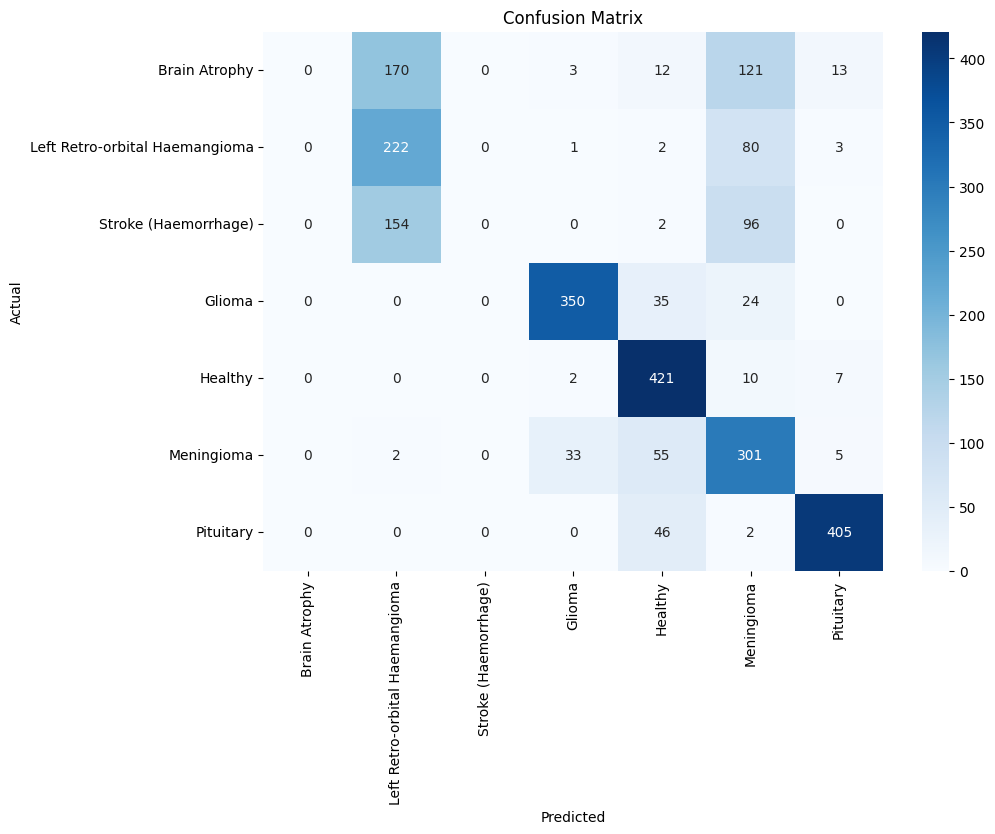

In [ ]:

#66
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)


class_labels = [
    "Brain Atrophy",
    "Left Retro-orbital Haemangioma",
    "Stroke (Haemorrhage)",
    "Glioma",
    "Healthy",
    "Meningioma",
    "Pituitary"
]


n_qubits = 8
q_depth = 5
batch_size = 32
dev = qml.device("default.qubit", wires=n_qubits)

dataset_path = "/content/mri_dataset_balanced/content/mri_dataset_balanced"


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (q_depth, n_qubits, 3)}
quantum_layer = qml.qnn.TorchLayer(qnode, weight_shapes)

class HybridQNN(nn.Module):
    def __init__(self):
        super(HybridQNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 96, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.batch_norm = nn.BatchNorm2d(96)
        self.dropout = nn.Dropout(0.4)
        self.fc1 = nn.Linear(96 * 4 * 4, n_qubits)
        self.q_layer = quantum_layer
        self.fc2 = nn.Linear(n_qubits, 7)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.batch_norm(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.q_layer(x)
        x = self.fc2(x)
        return x


model = HybridQNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-5)

epochs = 40
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Using: cpu
Epoch [1/30], Loss: 1.8876
Epoch [2/30], Loss: 1.7677
Epoch [3/30], Loss: 1.6338
Epoch [4/30], Loss: 1.4522
Epoch [5/30], Loss: 1.2806
Epoch [6/30], Loss: 1.2040
Epoch [7/30], Loss: 1.1526
Epoch [8/30], Loss: 1.0768
Epoch [9/30], Loss: 1.0027
Epoch [10/30], Loss: 0.9090
Epoch [11/30], Loss: 0.8028
Epoch [12/30], Loss: 0.7210
Epoch [13/30], Loss: 0.6351
Epoch [14/30], Loss: 0.5843
Epoch [15/30], Loss: 0.5302
Epoch [16/30], Loss: 0.4714
Epoch [17/30], Loss: 0.4342
Epoch [18/30], Loss: 0.3972
Epoch [19/30], Loss: 0.3650
Epoch [20/30], Loss: 0.3197
Epoch [21/30], Loss: 0.3005
Epoch [22/30], Loss: 0.2661
Epoch [23/30], Loss: 0.2516
Epoch [24/30], Loss: 0.2170
Epoch [25/30], Loss: 0.1926
Epoch [26/30], Loss: 0.1778
Epoch [27/30], Loss: 0.1644
Epoch [28/30], Loss: 0.1489
Epoch [29/30], Loss: 0.1282
Epoch [30/30], Loss: 0.1285

Classification Report:
                                precision    recall  f1-score   support

                 Brain Atrophy       0.62      0.64      0.63

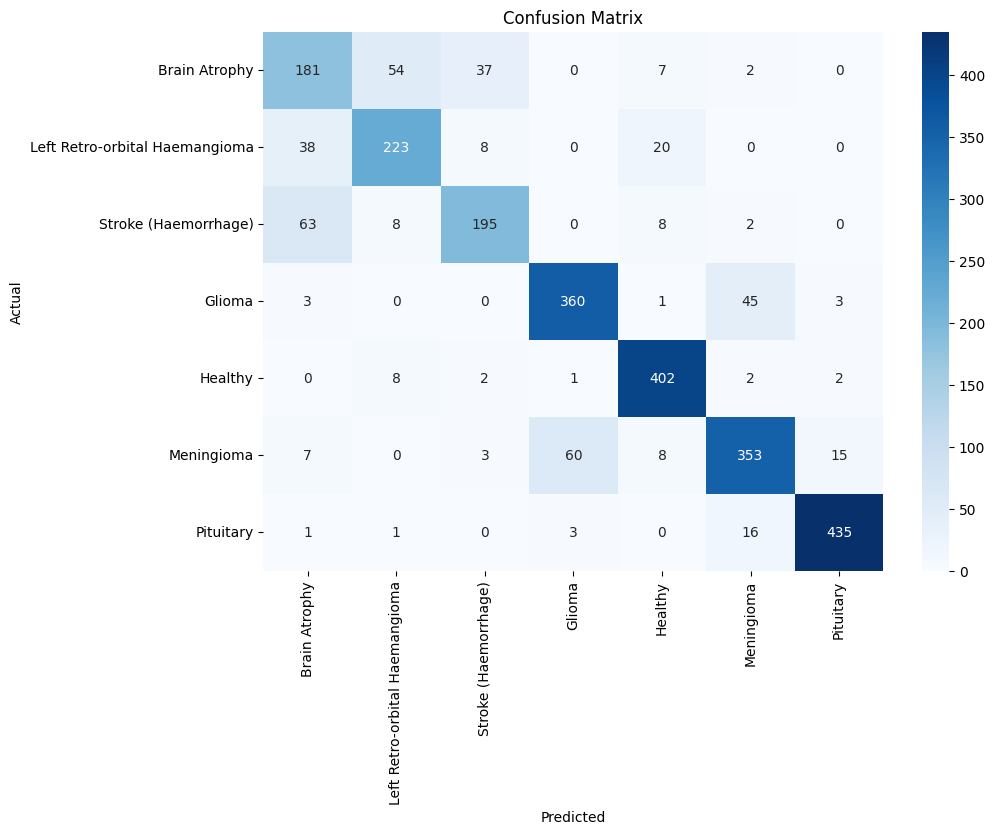

In [ ]:
#83
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

class_labels = [
    "Brain Atrophy",
    "Left Retro-orbital Haemangioma",
    "Stroke (Haemorrhage)",
    "Glioma",
    "Healthy",
    "Meningioma",
    "Pituitary"
]

n_qubits = 4
q_depth = 1
batch_size = 32
dev = qml.device("default.qubit", wires=n_qubits)

dataset_path = "/content/mri_dataset_balanced/content/mri_dataset_balanced"


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


@qml.qnode(dev, interface="torch")
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

weight_shapes = {"weights": (3, n_qubits)}
quantum_layer = qml.qnn.TorchLayer(qnode, weight_shapes)


class HybridQNN(nn.Module):
    def __init__(self):
        super(HybridQNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.batch_norm = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, n_qubits)
        self.q_layer = quantum_layer
        self.fc3 = nn.Linear(n_qubits, 7)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.batch_norm(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.q_layer(x)
        x = self.fc3(x)
        return x


model = HybridQNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 30
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Using: cpu
Epoch [1/30], Loss: 1.9553
Epoch [2/30], Loss: 1.8684
Epoch [3/30], Loss: 1.7589
Epoch [4/30], Loss: 1.6335
Epoch [5/30], Loss: 1.5030
Epoch [6/30], Loss: 1.3881
Epoch [7/30], Loss: 1.2871
Epoch [8/30], Loss: 1.2052
Epoch [9/30], Loss: 1.1410
Epoch [10/30], Loss: 1.0794
Epoch [11/30], Loss: 1.0315
Epoch [12/30], Loss: 0.9862
Epoch [13/30], Loss: 0.9483
Epoch [14/30], Loss: 0.9130
Epoch [15/30], Loss: 0.8851
Epoch [16/30], Loss: 0.8571
Epoch [17/30], Loss: 0.8280
Epoch [18/30], Loss: 0.8052
Epoch [19/30], Loss: 0.7863
Epoch [20/30], Loss: 0.7613
Epoch [21/30], Loss: 0.7473
Epoch [22/30], Loss: 0.7263
Epoch [23/30], Loss: 0.7084
Epoch [24/30], Loss: 0.6882
Epoch [25/30], Loss: 0.6705
Epoch [26/30], Loss: 0.6529
Epoch [27/30], Loss: 0.6359
Epoch [28/30], Loss: 0.6217
Epoch [29/30], Loss: 0.6046
Epoch [30/30], Loss: 0.5852

Classification Report:
                                precision    recall  f1-score   support

                 Brain Atrophy       0.53      0.42      0.47

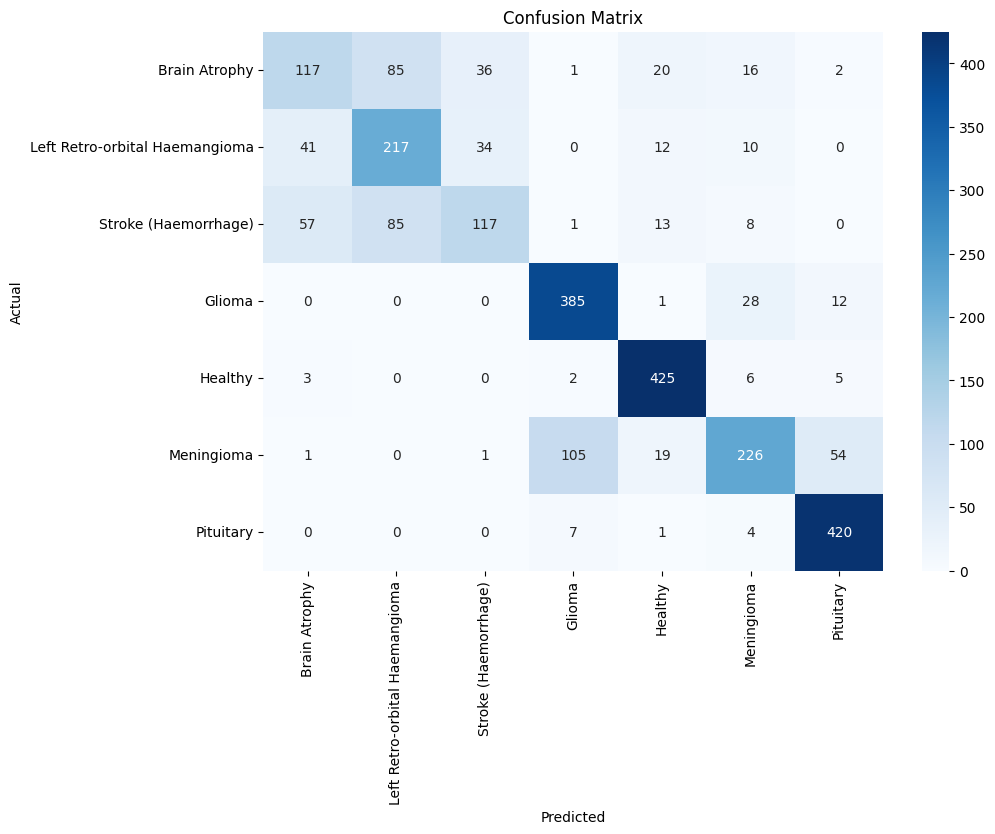

In [ ]:
#74
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

# Class Labels
class_labels = [
    "Brain Atrophy",
    "Left Retro-orbital Haemangioma",
    "Stroke (Haemorrhage)",
    "Glioma",
    "Healthy",
    "Meningioma",
    "Pituitary"
]


n_qubits = 8
q_depth = 4
batch_size = 32
dev = qml.device("default.qubit", wires=n_qubits)

dataset_path = "/content/mri_dataset_balanced/content/mri_dataset_balanced"


transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

full_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Quantum Convolutional Circuit
@qml.qnode(dev, interface="torch")
def qconv(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))

    weights = weights.reshape(q_depth, n_qubits, 3)

    for layer in range(q_depth):
        for i in range(n_qubits):
            qml.RX(weights[layer, i, 0], wires=i)
            qml.RZ(weights[layer, i, 1], wires=i)

    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

qconv_shapes = {"weights": (q_depth, n_qubits, 3)}
qconv_layer = qml.qnn.TorchLayer(qconv, qconv_shapes)

# Hybrid CNN-QNN Model
class HybridQNN(nn.Module):
    def __init__(self):
        super(HybridQNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, n_qubits)
        self.qconv = qconv_layer
        self.fc2 = nn.Linear(n_qubits, 7)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.qconv(x)
        x = self.fc2(x)
        return x

# Training
model = HybridQNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0003, weight_decay=1e-5)

epochs = 30
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
